<a href="https://www.kaggle.com/code/kbhuvana202006/task-1?scriptVersionId=296041550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

A linear regression model was implemented to predict house prices using square footage, number of bedrooms, and number of bathrooms. The model achieved an R² score of 0.63, indicating that these variables explain a significant portion of price variation. Square footage and bathrooms showed a positive influence on house prices, while bedrooms had a negative coefficient when controlling for total area. The results demonstrate that linear regression provides an interpretable and effective baseline model for house price prediction.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")


In [3]:
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]

X = train[features]
y = train["SalePrice"]


In [4]:
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 52975.72
R² Score: 0.63


In [8]:
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,GrLivArea,104.026307
1,BedroomAbvGr,-26655.165357
2,FullBath,30014.324109


In [9]:
model.intercept_


np.float64(52261.74862694461)

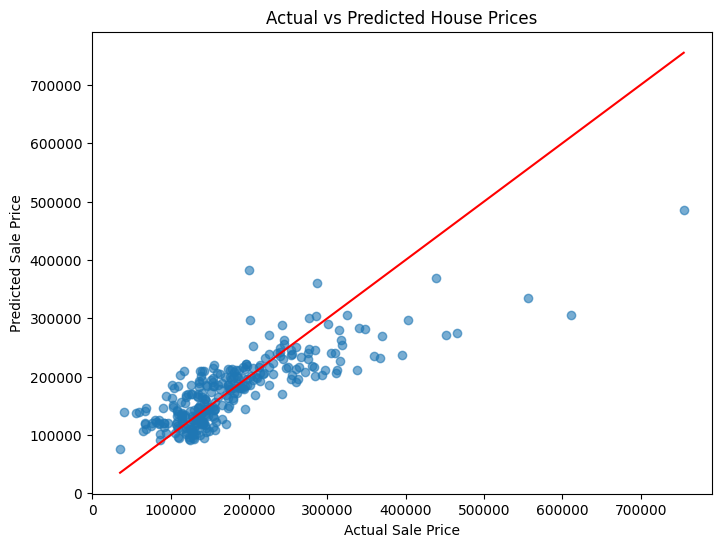

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         color="red")

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [11]:
new_house = np.array([[2000, 3, 2]])  # 2000 sqft, 3 bedrooms, 2 bathrooms
predicted_price = model.predict(new_house)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $240,377.51
